http://www.marketcalls.in/python/implementation-kalman-filter-estimation-mean-python-using-pykalman-bokeh-nsepy.html

https://pykalman.github.io/

The KalmanFilter class comes equipped with two algorithms for prediction: the Kalman Filter and the Kalman Smoother. While the former can be updated recursively (making it ideal for online state estimation), the latter can only be done in batch.

In [1]:
import pandas as pd
from datetime import date
from datetime import datetime
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets create measurement data

In [2]:
from scipy.stats import norm
# Process parameters
delta = 0.25
dt = 0.1
# Initial condition.
initial = 0.0
x = initial
# Number of iterations to compute.
n = 250
measurements = []
# Iterate to compute the steps of the Brownian motion.
for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    measurements.append(x)

Now init the filter

In [3]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = initial,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=0.1) # Vary to see effect on filter response. Value of 1 closely follows data

In [4]:
filtered_means, _ = kf.filter(measurements)
filtered_means = filtered_means.flatten()

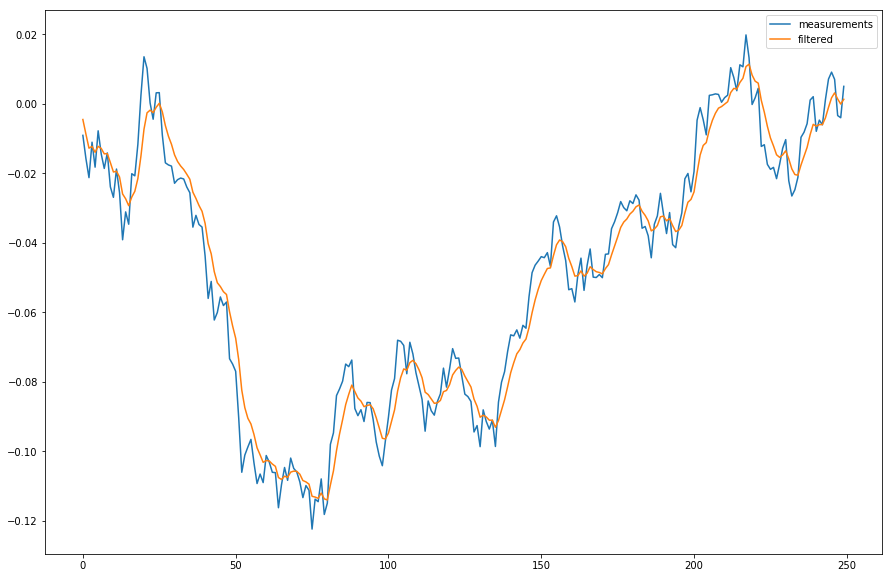

In [5]:
plt.figure(figsize=(15,10))
plt.plot(measurements, label = 'measurements');
plt.plot(filtered_means, label = 'filtered');
plt.legend();